In [47]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /Users/sd/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.metrics import confusion_matrix, classification_report,precision_score,recall_score,make_scorer
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from scipy.stats import randint, uniform


from time import perf_counter



In [49]:
from tqdm.notebook import tqdm

In [50]:
d=pd.read_csv(path+"/creditcard.csv")

In [51]:
df=d[:80000]
X=df.drop('Class',axis=1).values
y=df['Class'].values

In [52]:
pipe1 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42, n_jobs=-1))
])

In [53]:
param_dist1 = {
    'classifier__n_estimators': [100, 200],  # Keep 100–200; more may not help much
    'classifier__max_depth': [5, 7, 9],  # 🔧 Reduce depth (your 10 is too high if training=1.0)
    'classifier__min_samples_split': [20, 30, 40],  # 🔧 More samples to split slows overfitting
    'classifier__min_samples_leaf': [10, 15, 20],   # 🔧 Bigger leaf = smoother decision
    'classifier__max_features': ['sqrt', 'log2'],   # Already good
    'classifier__min_impurity_decrease': [0.001, 0.01]  # 🔧 Add stricter purity requirement
}


In [55]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    pipe1,
    param_distributions=param_dist1,
    n_iter=30,                # Try 30 different combinations
    cv=cv,                     # Reduce folds (see next)
    scoring={'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score)},
    refit='precision',
    n_jobs=-1,
    random_state=42,
    verbose=0
)

In [56]:
print(X.shape)

(80000, 30)


In [59]:
num_oness = (y == 1).sum()
print(f"Number of 1's in y: {num_oness}")

Number of 1's in y: 196


In [58]:
start = perf_counter()

for i in tqdm(range(5, 21, 5), desc="Training Random Forest"):
    search.fit(X, y)  # Same randomized search repeated 4 times

elapsed = perf_counter() - start
print(f"Training took {elapsed:.2f} seconds")


Training Random Forest:   0%|          | 0/4 [00:00<?, ?it/s]

Training took 1056.58 seconds


In [60]:
search.predict(X).sum()

np.int64(207)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
num_oness = (y_test == 1).sum()
print(f"Number of 1's in y: {num_oness}")

Number of 1's in y: 41


In [69]:
search.predict(X_test).sum()

np.int64(41)

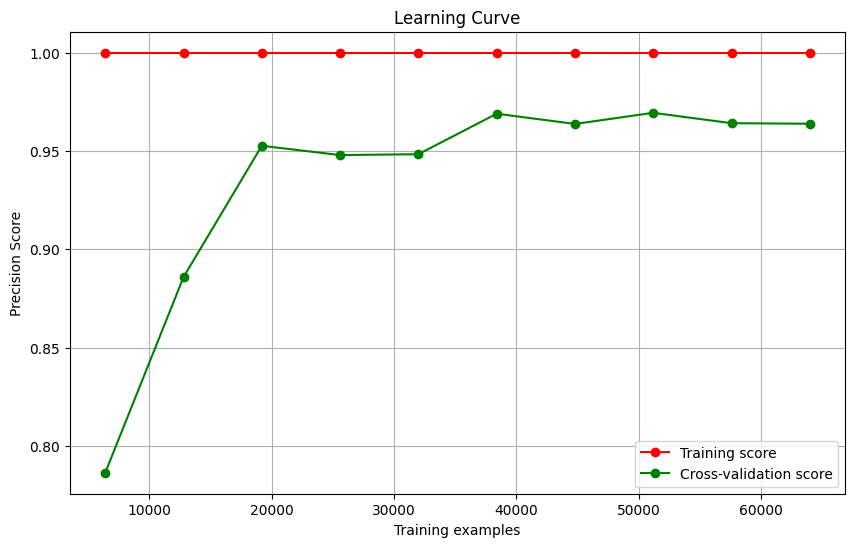

In [65]:


train_sizes, train_scores, test_scores = learning_curve(
    pipe1, X, y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10), scoring='precision',n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Precision Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.grid()
plt.show()

In [ ]:
#use randomSearchCv for faster results

In [66]:
best_model = search.best_estimator_
#to predict the best_model of gridsearchcv algo

In [67]:
best_model.predict(X).sum()

np.int64(207)

NameError: name 'ImbPipeline' is not defined

1.7.0
